Entraîner et Visualiser un arbre de décision

In [1]:
# Entraînement
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # longueur et largeur de pétale
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [2]:
# Visualisation
from sklearn.tree import export_graphviz
export_graphviz(
        tree_clf,
        out_file="./iris_tree_clf.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Estimation des probabilités des classes

In [3]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[5, 1.5]])

array([1])

Hyperparamètres de régularisation

In [5]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier()

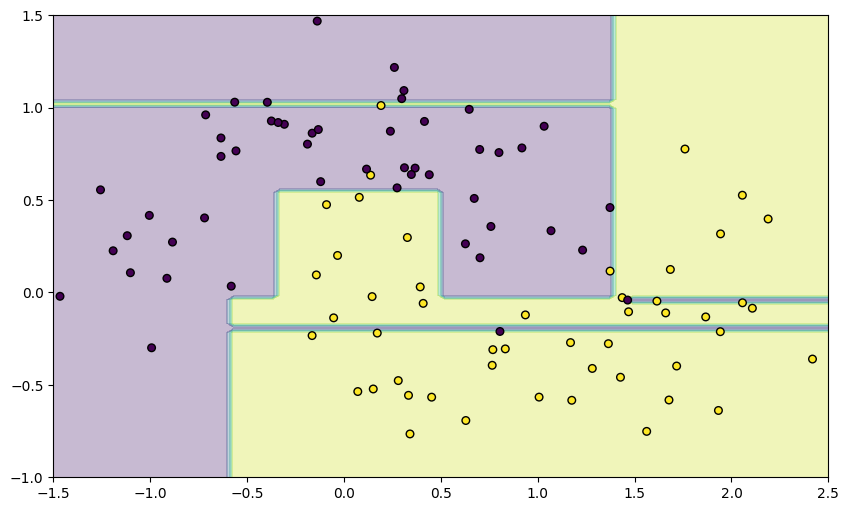

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor="k")
    plt.axis(axes)

plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.5, -1, 1.5])
plt.show()

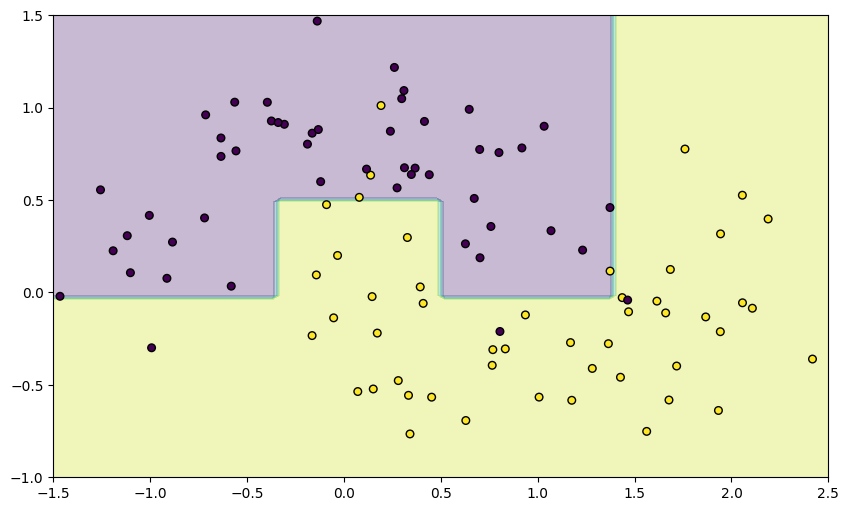

In [7]:
tree_clf = DecisionTreeClassifier(min_samples_leaf=4)
tree_clf.fit(X, y)

plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.5, -1, 1.5])
plt.show()

Régression

In [8]:
X = 2 * np.random.rand(100, 1)
y = X**2 - 2 * X + 1 + 0.1 * np.random.randn(100,1)

sorted_indices = np.argsort(X[:, 0])
X = X[sorted_indices]
y = y[sorted_indices]

y = y.ravel()

In [9]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(min_samples_leaf=10)
tree_reg.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=10)

In [10]:
export_graphviz(
        tree_reg,
        out_file="./iris_tree_reg.dot",
        rounded=True,
        filled=True
    )

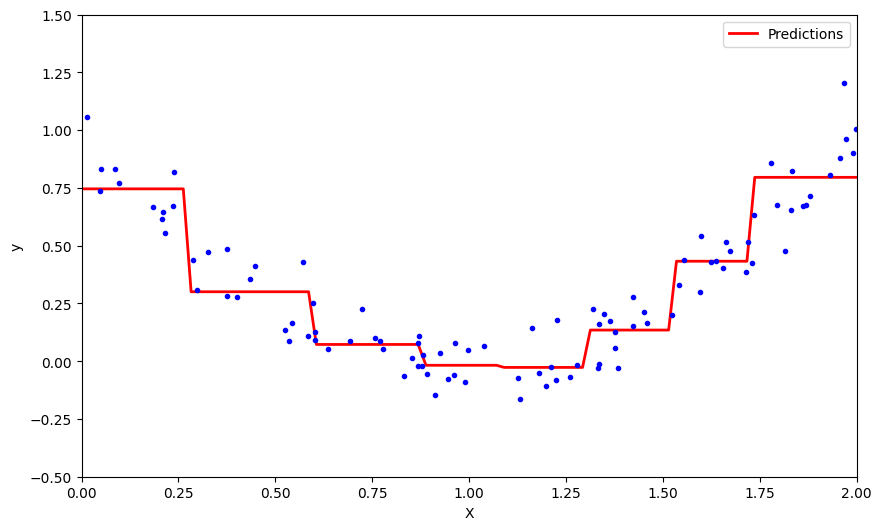

In [11]:
def plot_decision_boundary(reg, X, y, axes):
    X_new = np.linspace(axes[0], axes[1], 100).reshape(-1, 1)
    y_pred = reg.predict(X_new)
    plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predictions")
    plt.plot(X, y, "b.")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis(axes)
    plt.legend()

plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_reg, X, y, axes=[0, 2, -0.5, 1.5])
plt.show()